<a href="https://colab.research.google.com/github/olgagasowska/Machine-Learning-for-Linguists/blob/main/data_exploartion_from_hugging_face_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##### loading and exploring a dataset from Hugging Face, visualizing word frequencies and sentence lengths, and saving a subset of the dataset

In [ ]:
!pip install transformers datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00


Generating train split: 0 examples [00:00, ? examples/s]

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['sentiment', 'hatespeech', 'hate_speech_score', 'text'],
        num_rows: 135556
    })
})

First 5 examples from the training set:
Single test example:


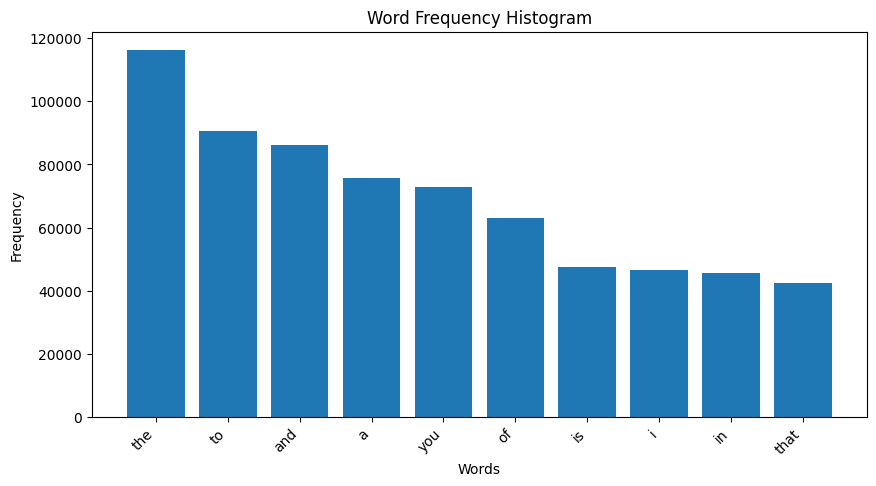

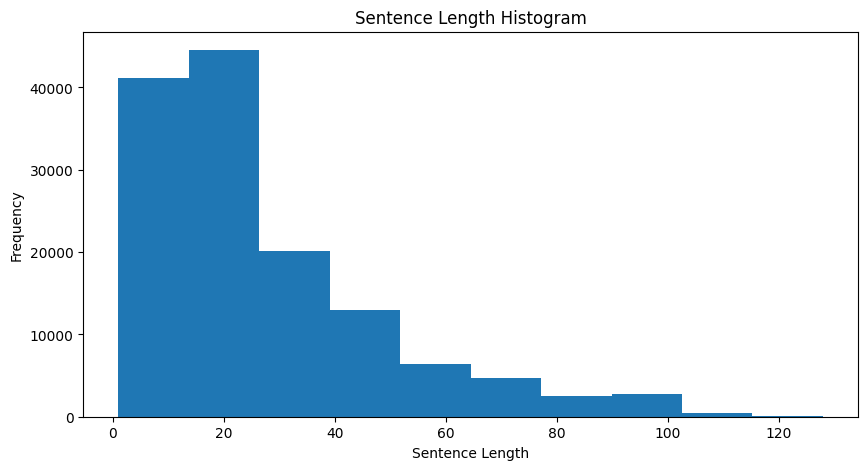

Saved 100 examples as 'subset_dataset.csv'.
Reloaded dataset from CSV:
   sentiment  hatespeech  hate_speech_score  \
0        0.0         0.0              -3.90   
1        0.0         0.0              -6.52   
2        4.0         2.0               0.36   
3        2.0         0.0               0.26   
4        4.0         2.0               1.54   

                                                text  
0  Yes indeed. She sort of reminds me of the elde...  
1  The trans women reading this tweet right now i...  
2  Question: These 4 broads who criticize America...  
3  It is about time for all illegals to go back t...  
4  For starters bend over the one in pink and kic...  


In [ ]:
# exercise_1.py
# Hugging Face Datasets Exercise

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Load a dataset
def load_and_explore_dataset(dataset_name="query_result-2.parquet"):
    """
    Load the dataset from Hugging Face and display some basic information.
    Students should replace the default dataset name if they wish to explore other datasets.
    """
    dataset = load_dataset('parquet', data_files='query_result-2.parquet')
    print(f"Dataset structure: {dataset}")

    # Display the first 5 examples from the training set
    print("\nFirst 5 examples from the training set:")
    # --- Students' Code Below ---
    print('Single test example:')
    dataset['train'][0:4]


    pass  # TODO: Display first 5 examples from training set

    return dataset

# Step 2: Basic Analysis (Students need to fill in the details for the following two functions)
def plot_word_frequency(dataset):
    """
    Plot the frequency of the top 10 most common words in the training set.
    - Students should:
      - Extract all words from the 'text' column of the dataset.
      - Use Counter to count word frequencies.
      - Plot the top 10 words in a bar plot using matplotlib.
    """
    # --- Students' Code Below ---

    all_words = ' '.join(dataset['train']['text']).lower().split()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(10)

    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top_words))
    plt.title('Word Frequency Histogram')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    pass  # TODO: Extract words, count frequencies, and plot top 10 most common words.

def plot_sentence_lengths(dataset):
    """
    Plot a histogram of sentence lengths in the training set.
    - Students should:
      - Compute the length of each sentence in the 'text' column by splitting on spaces.
      - Plot a histogram of sentence lengths using matplotlib.
    """
    # --- Students' Code Below ---

    sentence_lengths = [len(text.split()) for text in dataset['train']['text']]
    plt.figure(figsize=(10, 5))
    plt.hist(sentence_lengths, bins=10)
    plt.title('Sentence Length Histogram')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()

    pass  # TODO: Calculate sentence lengths and plot a histogram.

# Step 3: Save and Reload Data
def save_and_reload_subset(dataset):
    """
    Save the first 100 examples from the training set as CSV and reload it.
    """
    # Save the first 100 examples as a CSV file
    df = pd.DataFrame(dataset['train'].select(range(100)))

    # Save as CSV
    df.to_csv('subset_dataset.csv', index=False)
    print("Saved 100 examples as 'subset_dataset.csv'.")

    # Reload and display the dataset
    reloaded_df = pd.read_csv('subset_dataset.csv')
    print("Reloaded dataset from CSV:")
    print(reloaded_df.head())

if __name__ == "__main__":
    # Students can change the dataset they want to explore or leave it as is
    # --- Students' Code Below ---
    selected_dataset = "query_result-2.parquet" # TODO: Select dataset
    dataset = load_and_explore_dataset(selected_dataset)

    # Students will complete these functions
    plot_word_frequency(dataset)
    plot_sentence_lengths(dataset)

    # Save and reload a subset of the dataset
    save_and_reload_subset(dataset)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['sentiment', 'hatespeech', 'hate_speech_score', 'text'],
        num_rows: 135556
    })
})

First 5 examples from the training set:
Single test example:


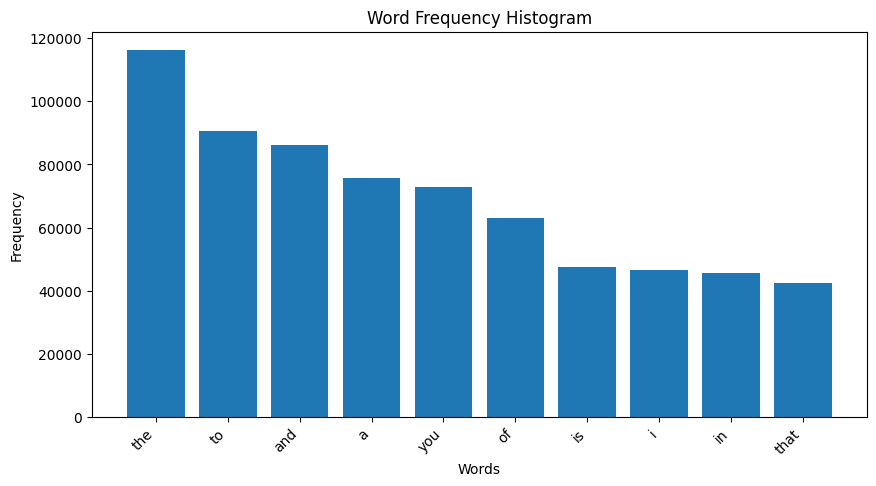

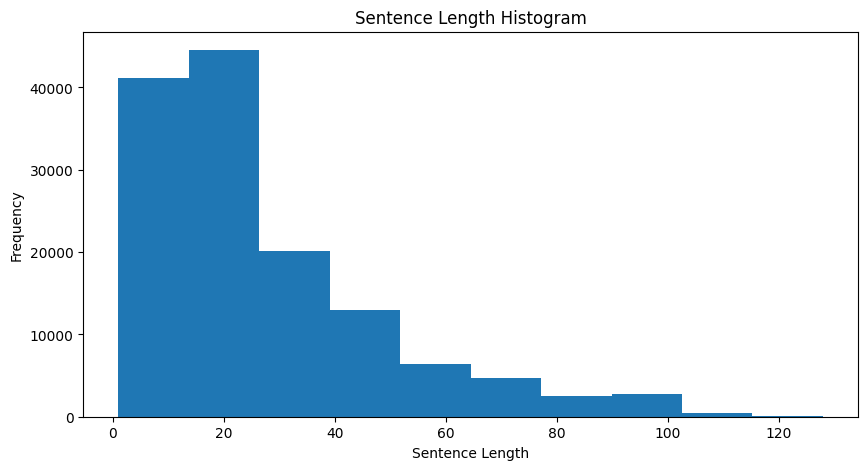

Saved 100 examples as 'subset_dataset.csv'.
Reloaded dataset from CSV:
   sentiment  hatespeech  hate_speech_score  \
0        0.0         0.0              -3.90   
1        0.0         0.0              -6.52   
2        4.0         2.0               0.36   
3        2.0         0.0               0.26   
4        4.0         2.0               1.54   

                                                text  
0  Yes indeed. She sort of reminds me of the elde...  
1  The trans women reading this tweet right now i...  
2  Question: These 4 broads who criticize America...  
3  It is about time for all illegals to go back t...  
4  For starters bend over the one in pink and kic...  


In [ ]:

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


def load_and_explore_dataset(dataset_name="query_result-2.parquet"):

    dataset = load_dataset('parquet', data_files='query_result-2.parquet')
    print(f"Dataset structure: {dataset}")


    print("\nFirst 5 examples from the training set:")

    print('Single test example:')
    dataset['train'][0:4]


    pass

    return dataset


def plot_word_frequency(dataset):


    all_words = ' '.join(dataset['train']['text']).lower().split()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(10)

    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top_words))
    plt.title('Word Frequency Histogram')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    pass

def plot_sentence_lengths(dataset):


    sentence_lengths = [len(text.split()) for text in dataset['train']['text']]
    plt.figure(figsize=(10, 5))
    plt.hist(sentence_lengths, bins=10)
    plt.title('Sentence Length Histogram')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()

    pass
def save_and_reload_subset(dataset):

    df = pd.DataFrame(dataset['train'].select(range(100)))


    df.to_csv('subset_dataset.csv', index=False)
    print("Saved 100 examples as 'subset_dataset.csv'.")


    reloaded_df = pd.read_csv('subset_dataset.csv')
    print("Reloaded dataset from CSV:")
    print(reloaded_df.head())

if __name__ == "__main__":

    selected_dataset = "query_result-2.parquet"
    dataset = load_and_explore_dataset(selected_dataset)

    # Students will complete these functions
    plot_word_frequency(dataset)
    plot_sentence_lengths(dataset)

    # Save and reload a subset of the dataset
    save_and_reload_subset(dataset)